<a href="https://colab.research.google.com/github/aang13/Google_colab_projects/blob/master/MonthLy_Motor_Vehicle_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rendering Data

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Motor Vehicle Prediction"

'Corporate Price Index _ Basic Classification.xlsm'
'Corporate Price Index _ Indices by Demand Stage and Use.xlsm'
'corporate service price index.xlsm'
'freight and passenger transportation.xlsm'
'Machine Order Statistics by Model.xlsm'
'Mechanical Sales Orders Statistics _ By Customer.xlsm'
'Sales of X Company Products.csv'
'Vital Statistics of Specified Service Industries _ Automobile Le.xlsm'


In [0]:
import pandas as pd
# read the files
path='/content/drive/My Drive/Motor Vehicle Prediction/'
corporatePriceIndexBasicClassification=pd.read_excel(path+'Corporate Price Index _ Basic Classification.xlsm')
CorporatePriceIndexIndicesbyDemandStageandUse=pd.read_excel(path+'Corporate Price Index _ Indices by Demand Stage and Use.xlsm')
corporateServicePriceIndex=pd.read_excel(path+'corporate service price index.xlsm') # missing
FreightAndPassengerTransportation=pd.read_excel(path+'freight and passenger transportation.xlsm')
MachineOrderStatisticsByModel=pd.read_excel(path+'Machine Order Statistics by Model.xlsm')
MechanicalSalesOrdersStatisticsByCustomer=pd.read_excel(path+'Mechanical Sales Orders Statistics _ By Customer.xlsm')
VitalStatisticsOfSpecifiedServiceIndustriesAutomobileLe=pd.read_excel(path+'Vital Statistics of Specified Service Industries _ Automobile Le.xlsm')

#DataCleaning
https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [96]:
corporatePriceIndexBasicClassification.isnull().sum().sum()

0

In [99]:
CorporatePriceIndexIndicesbyDemandStageandUse.isnull().sum().sum()

0

In [111]:
corporateServicePriceIndex.isnull().sum().sum()

960

In [127]:
FreightAndPassengerTransportation.isnull().sum().sum()


14

In [0]:
MachineOrderStatisticsByModel.isnull().sum().sum()

4

In [130]:
MechanicalSalesOrdersStatisticsByCustomer.isnull().sum().sum()

1417

In [0]:
VitalStatisticsOfSpecifiedServiceIndustriesAutomobileLe.isnull().sum().sum()

1236

#Time Series Analysis

corporatePriceIndexBasicClassification

In [0]:
corporatePriceIndexBasicClassification.rename(columns={"(Reference) Electricity, city gas and water after adjustment of summer electricity rates": "RECGWaASER"},inplace=True)


In [0]:
corporatePriceIndexBasicClassification['RECGWaASER']=corporatePriceIndexBasicClassification['RECGWaASER'].fillna(0)

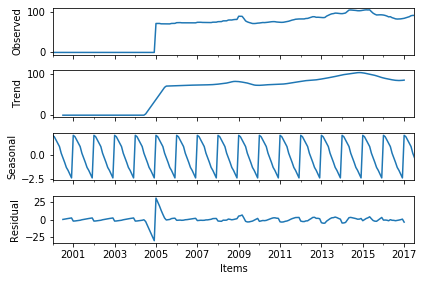

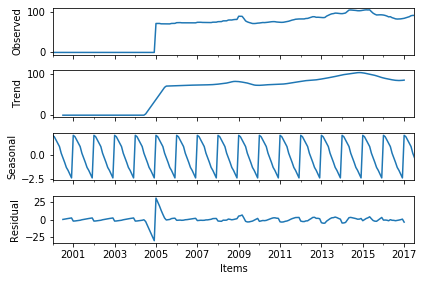

In [95]:
import matplotlib 
import statsmodels.api as sm
%matplotlib inline
#matplotlib.rcParams['figure.figsize']=[12.0,8.0]
corporatePriceIndexBasicClassification.reset_index(inplace=True)
corporatePriceIndexBasicClassification['Items']=pd.to_datetime(corporatePriceIndexBasicClassification['Items'])
corporatePriceIndexBasicClassification=corporatePriceIndexBasicClassification.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporatePriceIndexBasicClassification['RECGWaASER'])
seasonal_decompostion.plot()
# plt.show()


corporateServicePriceIndex

mearine passenger transport,water transport ancilary service, aviation facilities,internet related services,plant engineering,other technical services,employment placement services,education and training services,telemarketinglodging services,contract for schoo lunch

In [104]:
corporateServicePriceIndex.columns.to_list()

['Items',
 'total mean',
 'Finance and Insurance',
 'Finance',
 'insurance',
 'Real estate',
 'office rental',
 'Other Real Estate Rental',
 'Transportation and Postal Services',
 'passenger transport',
 'railway passenger transport',
 'road passenger transport',
 'marine passenger transport',
 'international air passenger transport',
 'domestic air passenger transport',
 'land freight transport',
 'rail freight transport',
 'road freight transport',
 'marine cargo transport',
 'ocean freight transport',
 'domestic cargo transport',
 'harbor transport',
 'air freight transport',
 'international air freight transport',
 'domestic air freight transport',
 'Warehousing and transportation ancillary services',
 'warehouse',
 'packing',
 'toll road',
 'water transport ancillary service',
 'Aviation facilities management and aviation ancillary services',
 'mail',
 'information and communication',
 'Communications',
 'fixed telecommunication',
 'mobile telecommunication',
 'access charge',
 'b

In [0]:
corporateServicePriceIndex.rename(columns={"marine passenger transport": "MPT"},inplace=True)


In [0]:
corporateServicePriceIndex['MPT']=corporateServicePriceIndex['MPT'].fillna(0)

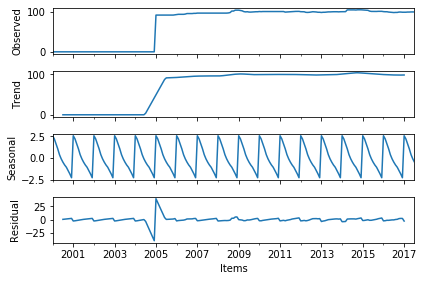

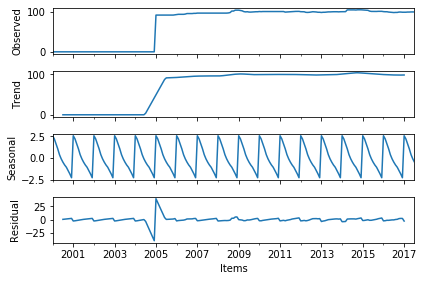

In [116]:
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['MPT'])
seasonal_decompostion.plot()


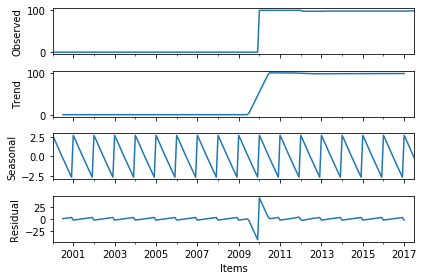

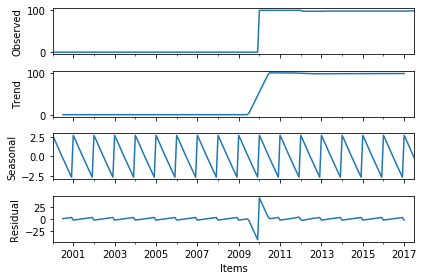

In [117]:
corporateServicePriceIndex.rename(columns={"water transport ancillary service": "WTAS"},inplace=True)
corporateServicePriceIndex['WTAS']=corporateServicePriceIndex['WTAS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['WTAS'])
seasonal_decompostion.plot()


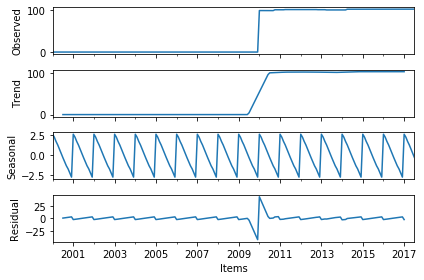

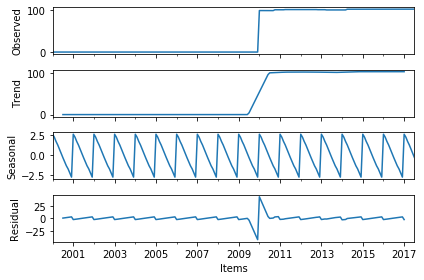

In [118]:
corporateServicePriceIndex.rename(columns={"Aviation facilities management and aviation ancillary services": "AFMAAS"},inplace=True)
corporateServicePriceIndex['AFMAAS']=corporateServicePriceIndex['AFMAAS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['AFMAAS'])
seasonal_decompostion.plot()

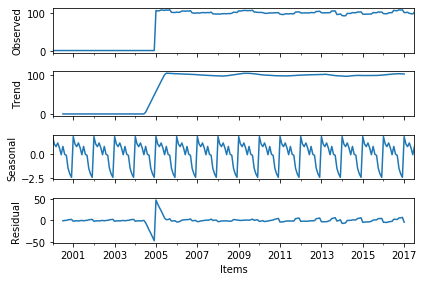

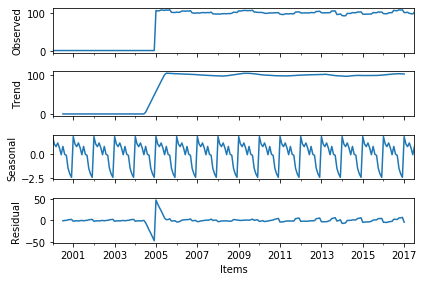

In [119]:

corporateServicePriceIndex.rename(columns={"Internet related services": "IRS"},inplace=True)
corporateServicePriceIndex['IRS']=corporateServicePriceIndex['IRS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['IRS'])
seasonal_decompostion.plot()

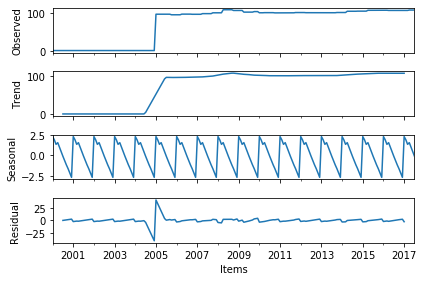

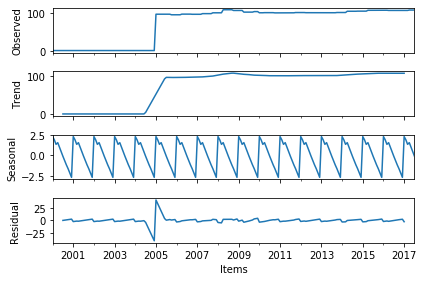

In [120]:

corporateServicePriceIndex.rename(columns={"plant engineering": "PE"},inplace=True)
corporateServicePriceIndex['PE']=corporateServicePriceIndex['PE'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['PE'])
seasonal_decompostion.plot()

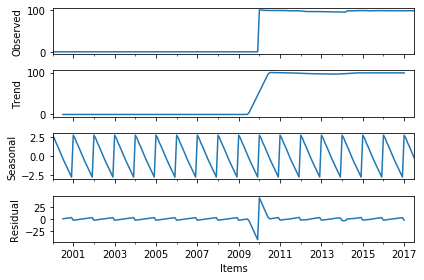

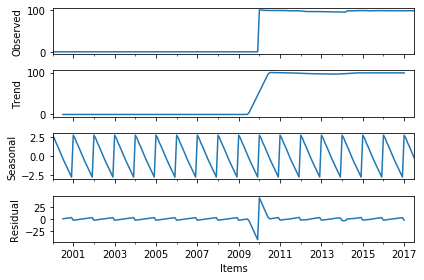

In [121]:
corporateServicePriceIndex.rename(columns={"Other Technical Services": "OTS"},inplace=True)
corporateServicePriceIndex['OTS']=corporateServicePriceIndex['OTS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['OTS'])
seasonal_decompostion.plot()

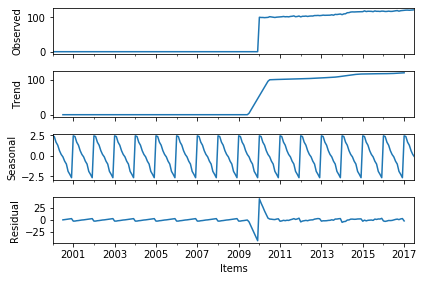

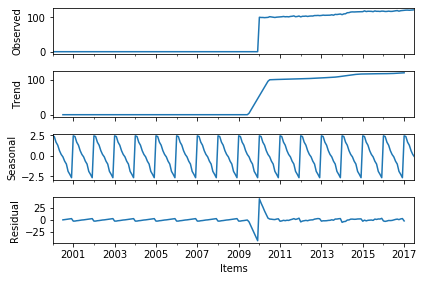

In [122]:
corporateServicePriceIndex.rename(columns={"Employment Placement Services": "EPS"},inplace=True)
corporateServicePriceIndex['EPS']=corporateServicePriceIndex['EPS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['EPS'])
seasonal_decompostion.plot()

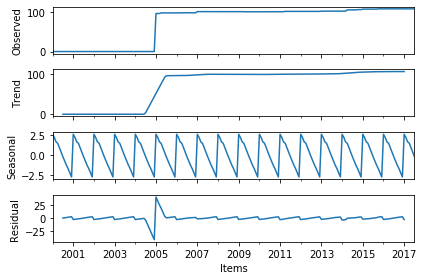

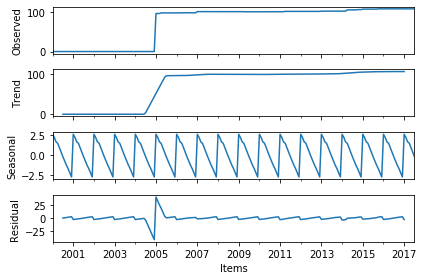

In [123]:
corporateServicePriceIndex.rename(columns={"education and training service": "ETS"},inplace=True)
corporateServicePriceIndex['ETS']=corporateServicePriceIndex['ETS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['ETS'])
seasonal_decompostion.plot()

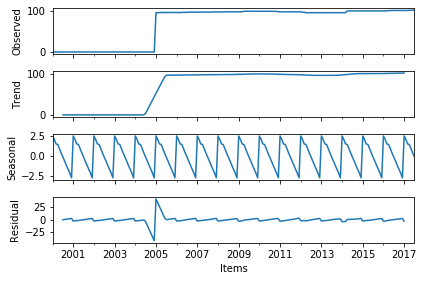

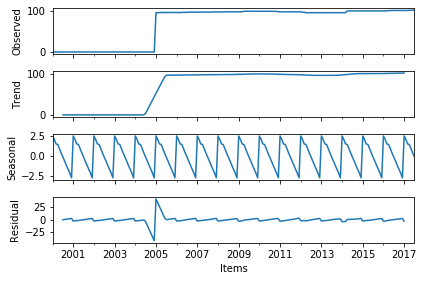

In [124]:
corporateServicePriceIndex.rename(columns={"telemarketing": "TMG"},inplace=True)
corporateServicePriceIndex['TMG']=corporateServicePriceIndex['TMG'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['TMG'])
seasonal_decompostion.plot()

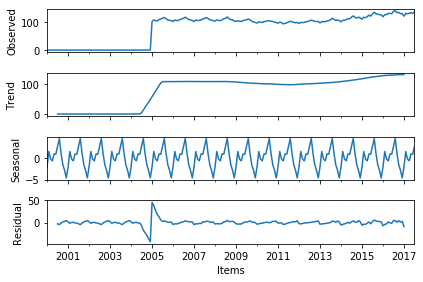

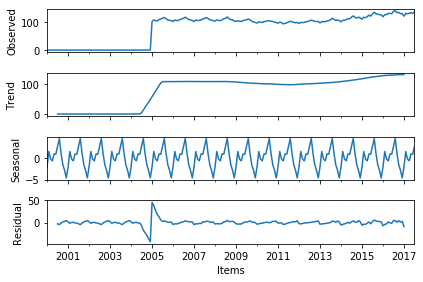

In [125]:
corporateServicePriceIndex.rename(columns={"lodging service": "LS"},inplace=True)
corporateServicePriceIndex['LS']=corporateServicePriceIndex['LS'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['LS'])
seasonal_decompostion.plot()

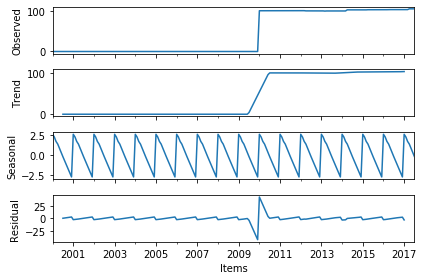

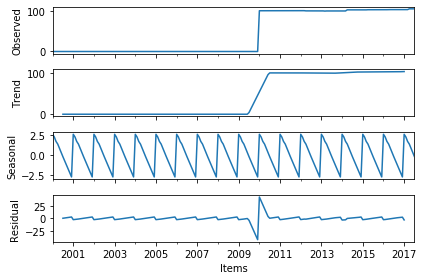

In [126]:
corporateServicePriceIndex.rename(columns={"Contract for school lunch": "CSFSL"},inplace=True)
corporateServicePriceIndex['CSFSL']=corporateServicePriceIndex['CSFSL'].fillna(0)
corporateServicePriceIndex.reset_index(inplace=True)
corporateServicePriceIndex['Items']=pd.to_datetime(corporateServicePriceIndex['Items'])
corporateServicePriceIndex=corporateServicePriceIndex.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(corporateServicePriceIndex['CSFSL'])
seasonal_decompostion.plot()

*FreightAndPassengerTransportation*

In [0]:
FreightAndPassengerTransportation=FreightAndPassengerTransportation.fillna(0)

*MechanicalSalesOrdersStatisticsByCustomer*

In [135]:
MechanicalSalesOrdersStatisticsByCustomer.columns.to_list()

['Items',
 'Total Order Amount',
 'Total Order Amount (excluding ships)',
 'external demand',
 'public demand',
 'private demand',
 'Private demand (excluding ships)',
 'Private demand (Excluding ships and electric power)',
 'Manufacturing',
 'non-manufacturing industry',
 'Non-Manufacturing (excluding ships)',
 'Non-Manufacturing (Excluding ships and electric power)',
 'agent',
 'domestic demand',
 'government and public market transportations',
 'Ministry of Defense',
 'state service by government and public demand',
 'local public service',
 'Public Sector Demand Translation and Other',
 'Breakdown of manufacturing industry Food manufacturing industry',
 'Breakdown of manufacturing industry Textile industry',
 'Breakdown of manufacturing industry Textile and clothing manufacturing industry',
 'Breakdown of Manufacturing Pulp, Paper, and Processed Paper',
 'Breakdown of Manufacturing Industry Chemical industry',
 'Breakdown of manufacturing industries Oil and coal products',
 'Cerami

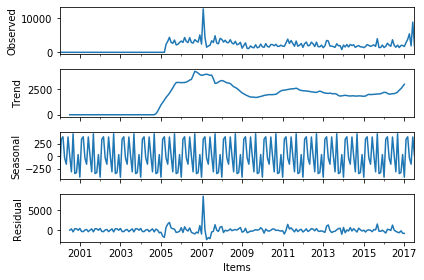

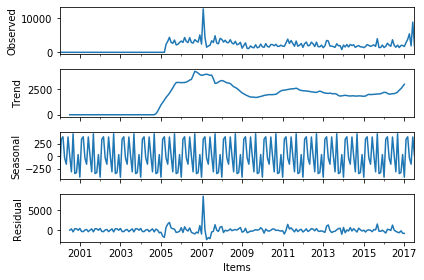

In [139]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing industry Textile industry": "BMITI"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMITI']=MechanicalSalesOrdersStatisticsByCustomer['BMITI'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMITI'])
seasonal_decompostion.plot()

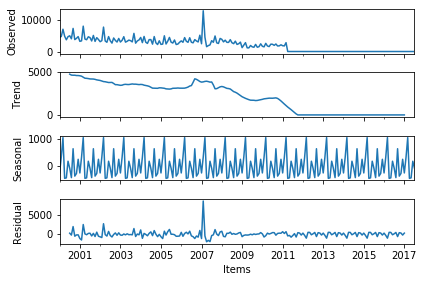

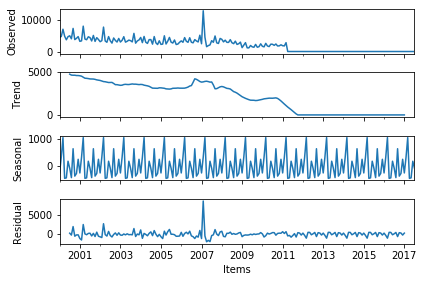

In [140]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing industry Textile and clothing manufacturing industry": "BMITCMI"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMITCMI']=MechanicalSalesOrdersStatisticsByCustomer['BMITCMI'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMITCMI'])
seasonal_decompostion.plot()

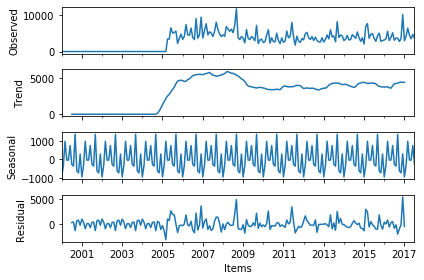

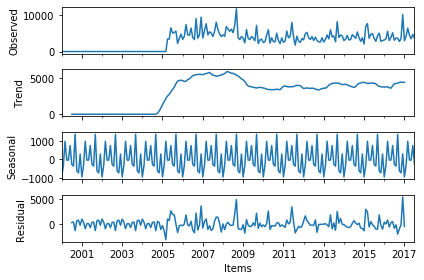

In [141]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Ceramics and stone products by type of manufacturing": "CSPTM"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['CSPTM']=MechanicalSalesOrdersStatisticsByCustomer['CSPTM'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['CSPTM'])
seasonal_decompostion.plot()

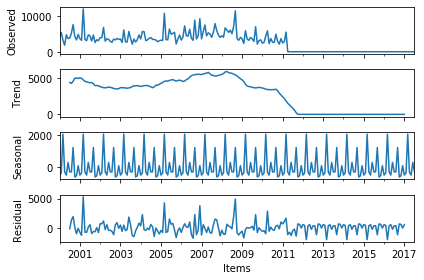

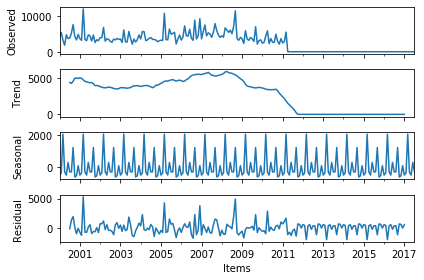

In [142]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Ceramics and stone products by type of manufacturing.1": "CSPTM1"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['CSPTM1']=MechanicalSalesOrdersStatisticsByCustomer['CSPTM1'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['CSPTM1'])
seasonal_decompostion.plot()

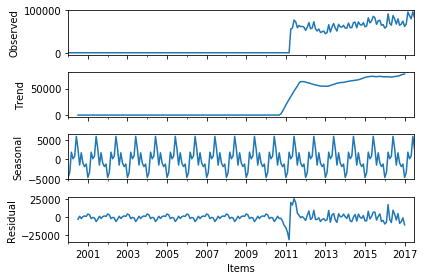

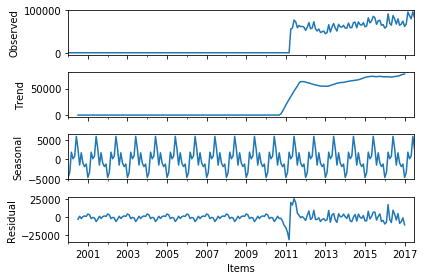

In [143]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of Manufacturing Machinery and equipment for general and production": "BMMEGP"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMMEGP']=MechanicalSalesOrdersStatisticsByCustomer['BMMEGP'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMMEGP'])
seasonal_decompostion.plot()

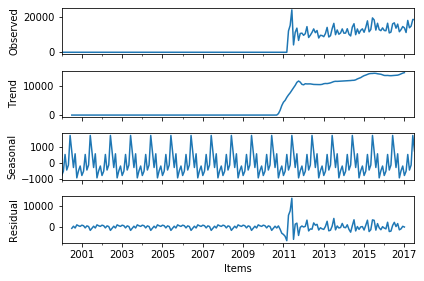

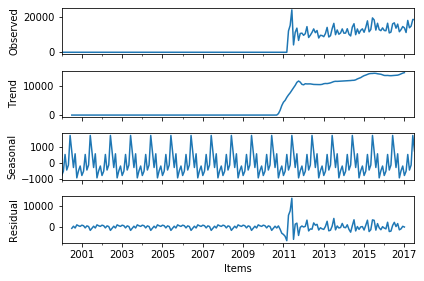

In [144]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing industry Commercial machinery and equipment manufacturing industry": "BMICMEMI"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMICMEMI']=MechanicalSalesOrdersStatisticsByCustomer['BMICMEMI'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMICMEMI'])
seasonal_decompostion.plot()

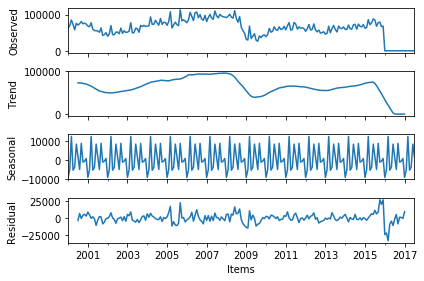

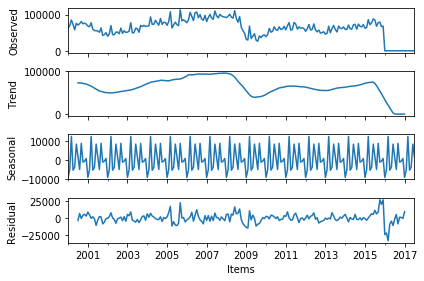

In [145]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing by general machinery": "BMGM"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMGM']=MechanicalSalesOrdersStatisticsByCustomer['BMGM'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMGM'])
seasonal_decompostion.plot()

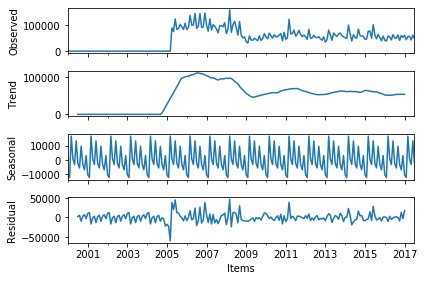

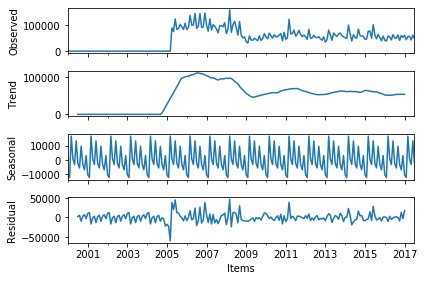

In [146]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing by electrical machinery and equipment": "BMEME"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMEME']=MechanicalSalesOrdersStatisticsByCustomer['BMEME'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMEME'])
seasonal_decompostion.plot()

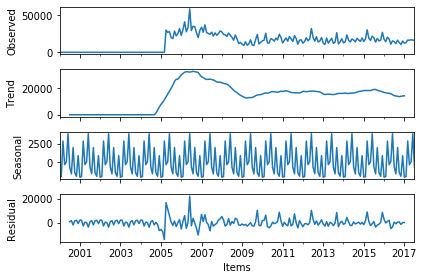

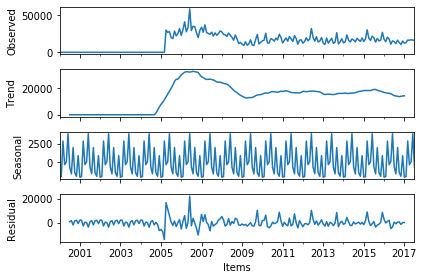

In [147]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of Manufacturing Information and Communication Equipment": "BMICE"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMICE']=MechanicalSalesOrdersStatisticsByCustomer['BMICE'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMICE'])
seasonal_decompostion.plot()

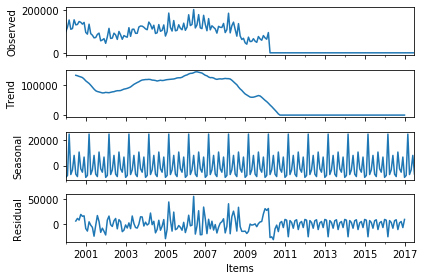

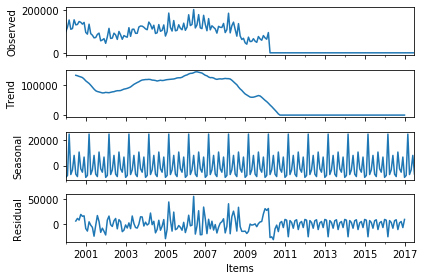

In [148]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing by electrical machinery (Include information and communications equipment)": "BMEMIICE"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMEMIICE']=MechanicalSalesOrdersStatisticsByCustomer['BMEMIICE'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMEMIICE'])
seasonal_decompostion.plot()

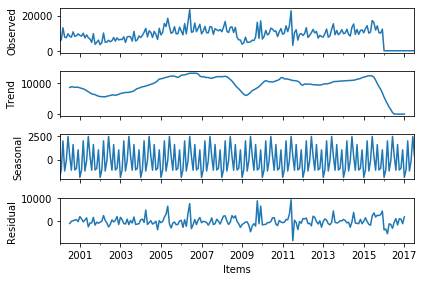

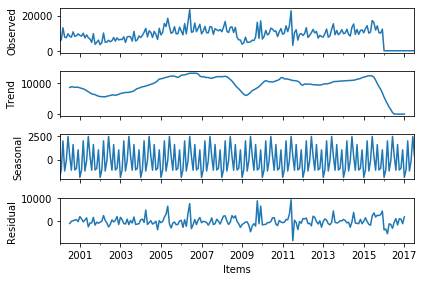

In [149]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of Manufacturing Industry Precision Machinery": "BMIPM"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMIPM']=MechanicalSalesOrdersStatisticsByCustomer['BMIPM'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMIPM'])
seasonal_decompostion.plot()

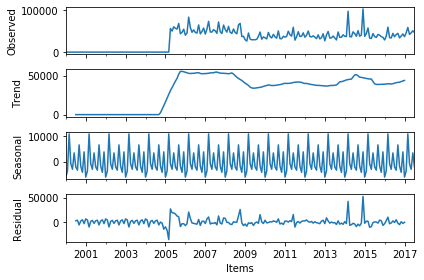

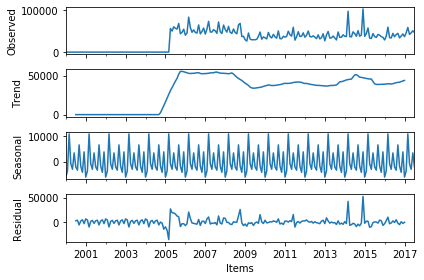

In [150]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of Manufacturing and Other Manufacturing": "BMOM"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMOM']=MechanicalSalesOrdersStatisticsByCustomer['BMOM'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMOM'])
seasonal_decompostion.plot()

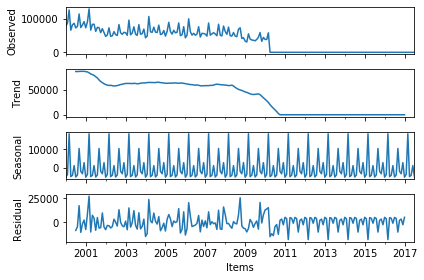

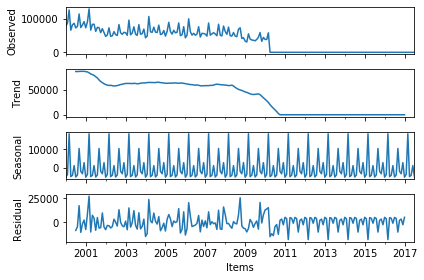

In [151]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing and others (including food, rubber and leather, weapons, and newspaper publishing)": "BMOIFRLWNP"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMOIFRLWNP']=MechanicalSalesOrdersStatisticsByCustomer['BMOIFRLWNP'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMOIFRLWNP'])
seasonal_decompostion.plot()

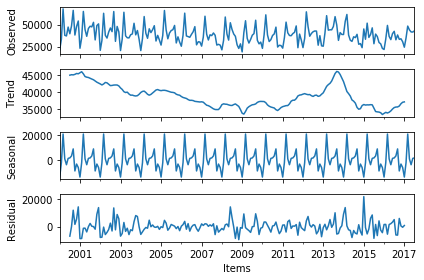

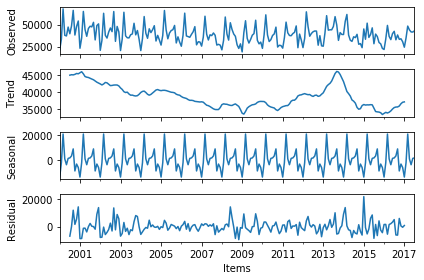

In [152]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of non-manufacturing industries Agriculture, Forestry and Fisheries": "BNIAFF"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BNIAFF']=MechanicalSalesOrdersStatisticsByCustomer['BNIAFF'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BNIAFF'])
seasonal_decompostion.plot()

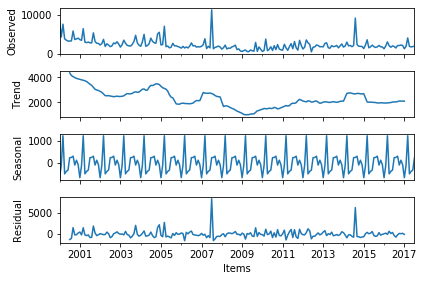

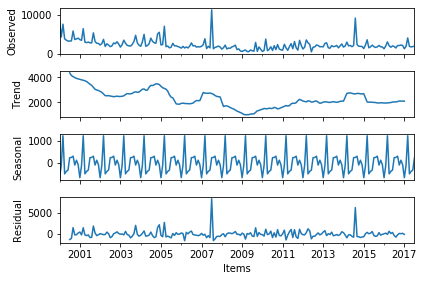

In [153]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of non-manufacturing industries: mining, quarrying, and gravel extraction": "BNIMQGE"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BNIMQGE']=MechanicalSalesOrdersStatisticsByCustomer['BNIMQGE'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BNIMQGE'])
seasonal_decompostion.plot()

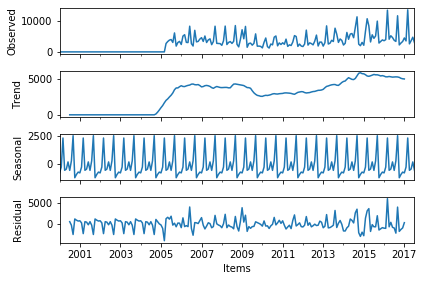

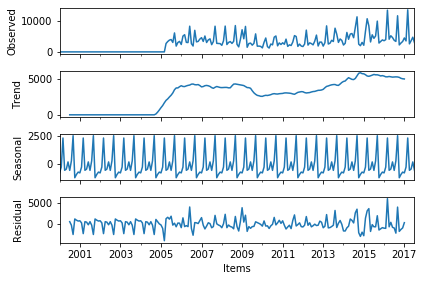

In [154]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Non-manufacturing Real Estate": "NRE"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['NRE']=MechanicalSalesOrdersStatisticsByCustomer['NRE'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['NRE'])
seasonal_decompostion.plot()

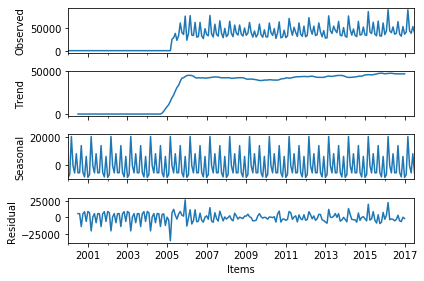

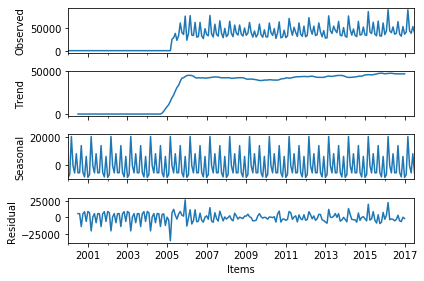

In [155]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of non-manufacturing industries Information services": "BNIIS"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BNIIS']=MechanicalSalesOrdersStatisticsByCustomer['BNIIS'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BNIIS'])
seasonal_decompostion.plot()

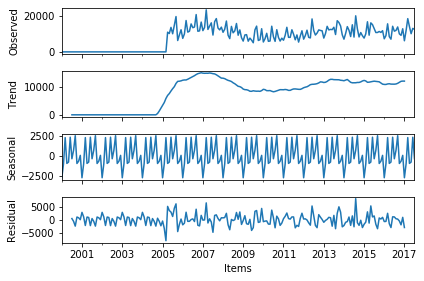

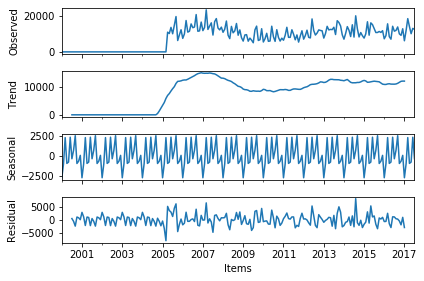

In [156]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Leasing by type of non-manufacturing industry": "LTNI"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['LTNI']=MechanicalSalesOrdersStatisticsByCustomer['LTNI'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['LTNI'])
seasonal_decompostion.plot()

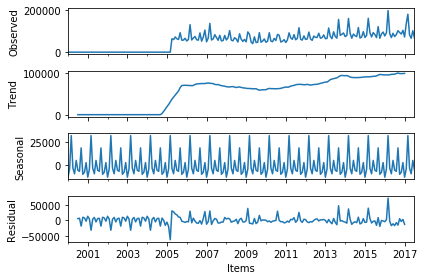

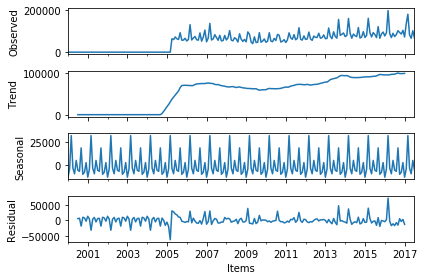

In [157]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Non-Manufacturing and other non-manufacturing industries": "NONI"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['NONI']=MechanicalSalesOrdersStatisticsByCustomer['NONI'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['NONI'])
seasonal_decompostion.plot()

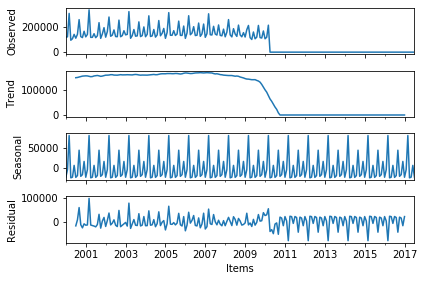

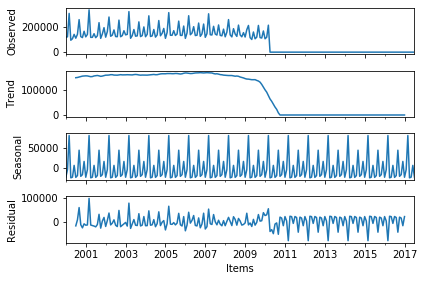

In [158]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Non-manufacturing sector breakdown Other (Including wholesale and retail, real estate, information and leasing)": "NSBOIWRRIL"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['NSBOIWRRIL']=MechanicalSalesOrdersStatisticsByCustomer['NSBOIWRRIL'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['NSBOIWRRIL'])
seasonal_decompostion.plot()

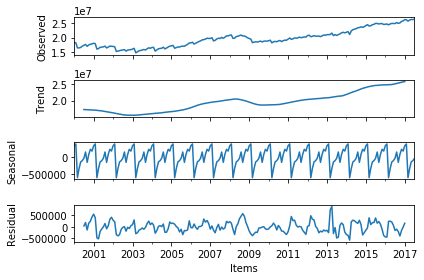

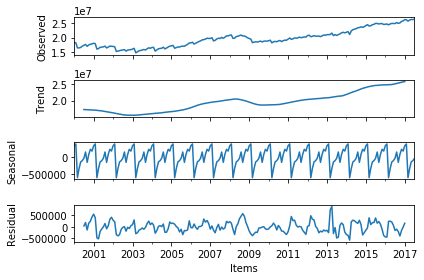

In [159]:
MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Order Balance (excluding ships)": "OBES"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['OBES']=MechanicalSalesOrdersStatisticsByCustomer['OBES'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['OBES'])
seasonal_decompostion.plot()

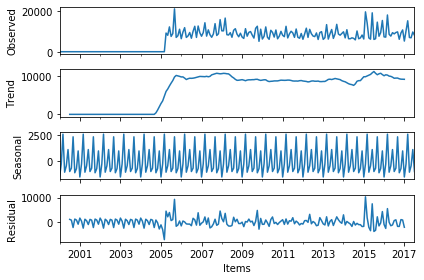

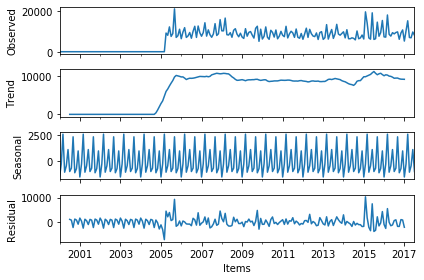

In [160]:

MechanicalSalesOrdersStatisticsByCustomer.rename(columns={"Breakdown of manufacturing industry Food manufacturing industry": "BMIFMI"},inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['BMIFMI']=MechanicalSalesOrdersStatisticsByCustomer['BMIFMI'].fillna(0)
MechanicalSalesOrdersStatisticsByCustomer.reset_index(inplace=True)
MechanicalSalesOrdersStatisticsByCustomer['Items']=pd.to_datetime(MechanicalSalesOrdersStatisticsByCustomer['Items'])
MechanicalSalesOrdersStatisticsByCustomer=MechanicalSalesOrdersStatisticsByCustomer.set_index('Items')
seasonal_decompostion= sm.tsa.seasonal_decompose(MechanicalSalesOrdersStatisticsByCustomer['BMIFMI'])
seasonal_decompostion.plot()

#Handling missing values

![alt text](https://miro.medium.com/max/1589/1*_RA3mCS30Pr0vUxbp25Yxw.png) 

https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4